In [29]:
# Data Analytics II
#     1. Implement logistic regression using Python/R to perform classification
#     2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate,
#     Precision,Recall on the given dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
# Loading 'Age', 'Estimated_salary' as the features in 'x' and 'Purchased' as the target variable in 'y'
x = df.iloc[:,2:4]
y = df.iloc[:,4]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
print(x_train, y_train)
print(x_test, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


     Age  EstimatedSalary
247   57           122000
110   39            71000
16    47            25000
66    24            19000
153   36            50000
..   ...              ...
71    24            27000
106   26            35000
270   43           133000
348   39            77000
102   32            86000

[300 rows x 2 columns] 247    1
110    0
16     1
66     0
153    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 300, dtype: int64
     Age  EstimatedSalary
209   46            22000
280   59            88000
33    28            44000
210   48            96000
93    29            28000
..   ...              ...
314   39            79000
373   59           130000
380   42            64000
239   53           143000
75    34           112000

[100 rows x 2 columns] 209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64
(300, 2) (100, 2) (300,) (100,)


In [35]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

print(x_train[:3])
print('-'*15)
print(x_test[:3])

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]]
---------------
[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]]


In [36]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [37]:
print('Expected Output:',pred[:10])
print('-'*15)
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]
---------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [38]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[61  2]
 [12 25]]


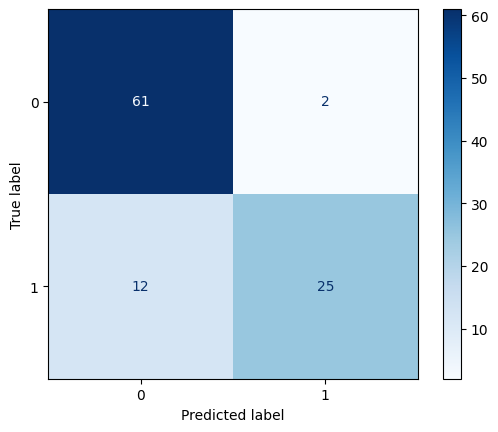

In [39]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap='Blues')
plt.show()

In [40]:
print(classification_report(y_test,pred))

print('True Positives:',tp)
print('False Negatives:',fn)
print('False Positives:',fp)
print('True Negatives:',tn)

print('Accuracy:',accuracy_score(y_test,pred))
print('Error Rate:',1-accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100

True Positives: 25
False Negatives: 12
False Positives: 2
True Negatives: 61
Accuracy: 0.86
Error Rate: 0.14
Precision: 0.9259259259259259
Recall: 0.6756756756756757


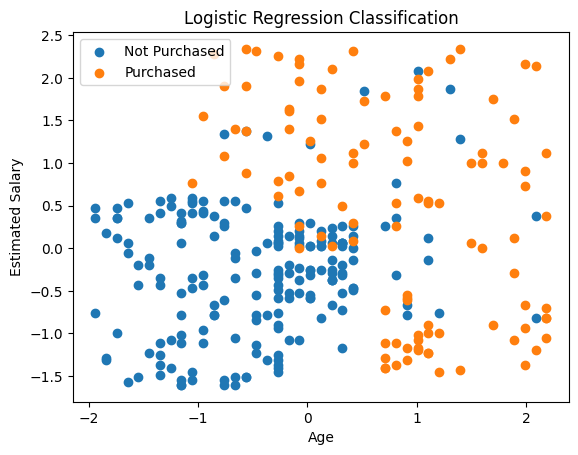

In [41]:
# scatter plot for only x_train and y_train
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1])
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1])
plt.title('Logistic Regression Classification')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(['Not Purchased', 'Purchased'])
plt.show()

